In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
import pickle, os

In [50]:
with open('sv1_objects.pkl', 'rb') as f:
    sv_objects = pickle.load(f)

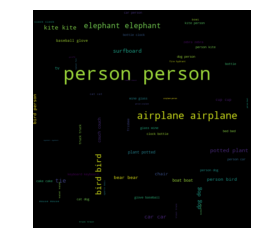

In [88]:
from wordcloud import WordCloud
text = ""
for i in range(len(sv_objects)): #returns a list of non-unique objects
    temp_dict = list(sv_objects[i].keys())
    for j in range(len(temp_dict)):
        text += temp_dict[j] + ' '
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [6]:
n_frames = len(sv_objects)
n_objects_by_frame = np.array([len(d) for d in sv_objects])

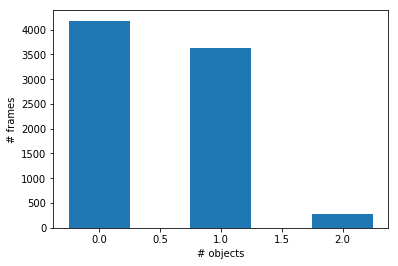

fraction frames with no objects: 0.516049


In [8]:
plt.hist(n_objects_by_frame, bins=n_objects_by_frame.max(), align='left', rwidth=0.5)
plt.xlabel('# objects')
plt.ylabel('# frames')
plt.show()
print('fraction frames with no objects: %f' % (n_objects_by_frame == 0).mean())

In [15]:
unique_objects = np.unique(np.concatenate([list(d.keys()) for d in sv_objects]))
n_unique_objects = len(unique_objects)
object_index = dict(zip(unique_objects, range(n_unique_objects)))

In [47]:
objects_barcode = np.zeros((n_unique_objects, n_frames), dtype=bool)
for frame, d in enumerate(sv_objects):
    for object in d:
        objects_barcode[object_index[object], frame] = True

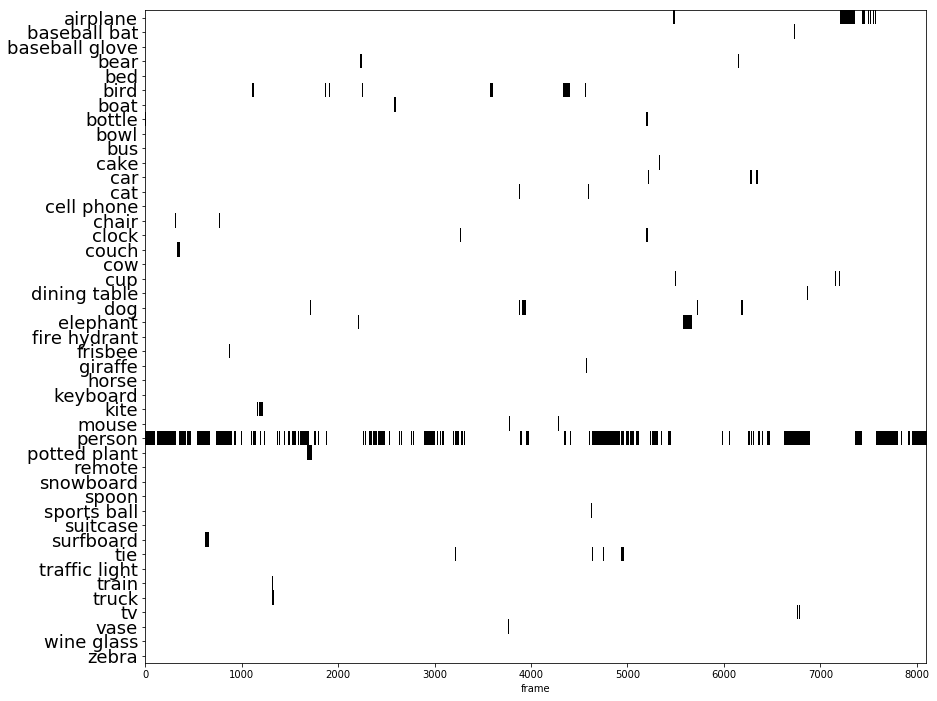

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(14,12))
ax.imshow(objects_barcode, aspect='auto', cmap=plt.get_cmap('Greys'))
ax.set_yticks(range(n_unique_objects))
ax.set_yticklabels(unique_objects, fontsize=18)
ax.set_xlabel('frame')
plt.show()

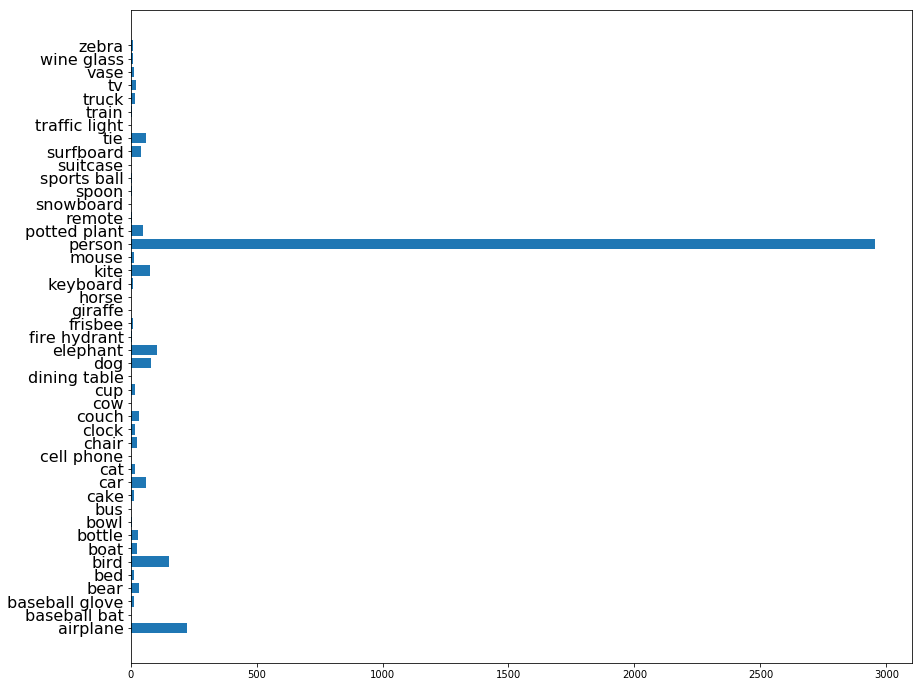

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(14,12))
ax.barh(range(n_unique_objects), objects_barcode.sum(1))
ax.set_yticks(range(n_unique_objects))
ax.set_yticklabels(unique_objects, fontsize=16)
plt.show()

In [9]:
if not os.path.exists('sv_words.mp4'):
    sv = np.load('sv.npy')

    fig = plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.axis('off')

    artists = [[ax.imshow(sv[frame], aspect='equal')] 
               + [ax.text(64, 64, unique_objects[objects_barcode[:, frame]], ha='center', fontsize=24, color='r')] for frame in range(n_frames)]
    anim = ArtistAnimation(fig, artists, interval=1000./15.)
    anim.save('sv_.mp4')

In [10]:
from IPython.core.display import display, HTML
display(HTML('<video controls><source src="sv.mp4" type="video/mp4"></video>'))